In [250]:
import numpy as np
import pandas as pd
import seaborn as sns

In [251]:
df = pd.read_csv('Health Insurance.csv')
df.head().T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33,22.705,28.88
children,0.0,1.0,3.0,0.0,0.0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924$,1725.5523$,4449.462$,21984.47061$,3866.8552$


In [252]:
num_col = df.columns.to_list()

In [253]:
num_col.remove('sex')
num_col.remove('region')
num_col.remove('smoker')

In [254]:
cat_cols = list(set(df.columns.to_list()) - set(num_col))
cat_cols

['smoker', 'region', 'sex']

In [255]:
noise=[]
for i in num_col:
    noise.append(str(i))
    for j in df[i]:
        try:
            float(j)
        except:
            noise.append(j)
    print(noise)
    noise.clear()
    

['age', '/*', '" "']
['bmi', '%']
['children']
['charges', '16884.924$', '1725.5523$', '4449.462$', '21984.47061$', '3866.8552$', '3756.6216$', '8240.5896$', '7281.5056$', '6406.4107$', '28923.13692$', '2721.3208$', '27808.7251$', '1826.843$', '11090.7178$', '39611.7577$', '1837.237$', '10797.3362$', '2395.17155$', '10602.385$', '36837.467$', '13228.84695$', '4149.736$', '1137.011$', '37701.8768$', '6203.90175$', '14001.1338$', '14451.83515$', '12268.63225$', '2775.19215$', '38711$', '35585.576$', '2198.18985$', '4687.797$', '13770.0979$', '51194.55914$', '1625.43375$', '15612.19335$', '2302.3$', '39774.2763$', '48173.361$', '3046.062$', '4949.7587$', '6272.4772$', '6313.759$', '6079.6715$', '20630.28351$', '3393.35635$', '3556.9223$', '12629.8967$', '38709.176$', '2211.13075$', '3579.8287$', '23568.272$', '37742.5757$', '8059.6791$', '47496.49445$', '13607.36875$', '34303.1672$', '23244.7902$', '5989.52365$', '8606.2174$', '4504.6624$', '30166.61817$', '4133.64165$', '14711.7438$', '1

In [256]:
df['charges'] = df['charges'].str.replace("$","")

C:\Users\farzi\AppData\Local\Temp\ipykernel_18040\2489431622.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['charges'] = df['charges'].str.replace("$","")


In [257]:
for i in num_col:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [258]:
print(df['age'].mean())
df['age']=df['age'].fillna(39.10)

39.10746460746461


In [259]:
print(df['children'].mode())
df['children']=df['children'].fillna(0)

0    0.0
Name: children, dtype: float64


In [260]:
print(df['region'].mode())
df['region']=df['region'].fillna('southeast')


0    southeast
Name: region, dtype: object


In [261]:
print(df['bmi'].mean())
df['bmi']=df['bmi'].fillna(30.64)

30.643889246619445


In [262]:
print(df['charges'].mean())
df['charges']=df['charges'].fillna(13253.41)

13253.412897909326


In [263]:
def func_bmi(data):
    if data%2==0:
        return "Yes"
    else:
        return "No"

In [264]:
df['P-BMI'] = df['bmi'].apply(func_bmi)

In [265]:
df.describe()

,age,bmi,children,charges
count,1563.000000,1563.000000,1563.000000,1563.000000
mean,39.107422,30.643864,1.085093,13253.412883
std,14.102947,6.137625,1.200107,12087.540169
min,18.000000,0.000000,0.000000,1121.873900
25%,26.000000,26.315000,0.000000,4779.602300
50%,39.000000,30.495000,1.000000,9361.326800
75%,51.000000,34.785000,2.000000,16359.170275
max,64.000000,53.130000,5.000000,63770.428010


In [266]:
cat_cols.append('P-BMI')

In [267]:
cat_cols

['smoker', 'region', 'sex', 'P-BMI']

In [268]:
for i in cat_cols:
    li=[]
    li.append(i)
    li.append(df[i].unique())
    print(li)
    li.clear()

['smoker', array(['yes', 'no', '-', '0'], dtype=object)]
['region', array(['southwest', 'southeast', 'northwest', 'northeast', '" "'],
      dtype=object)]
['sex', array(['female', 'male', '%'], dtype=object)]
['P-BMI', array(['No', 'Yes'], dtype=object)]


In [269]:
def func_smoker(data):
    if data == 'yes':
        return data
    elif data == 'no':
        return data
    else:
        return 'no'
df['smoker'] = df['smoker'].apply(func_smoker)

In [270]:
def func_region(data):
    if data == 'southwest':
        return data
    elif data == 'southeast':
        return data
    elif data == 'northwest':
        return data
    elif data == 'northeast':
        return data
    else:
        return np.nan
df['region'] = df['region'].apply(func_region)

In [271]:
def func_sex(data):
    if data == 'female':
        return data
    elif data == 'male':
        return data
    else:
        return np.nan
df['sex'] = df['sex'].apply(func_sex)

In [272]:
print(df['region'].mode())
df['region']=df['region'].fillna('southeast')


0    southeast
Name: region, dtype: object


In [273]:
print(df['sex'].mode())
df['sex']=df['sex'].fillna('male')


0    male
Name: sex, dtype: object


In [274]:
desc = pd.DataFrame(index=list(df))
desc['cnt']=df.shape[0]
desc['null_cnt'] = df.isnull().sum()
desc['nunique'] = df.nunique()
desc['dtype'] = df.dtypes
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,cnt,null_cnt,nunique,dtype,count,mean,std,min,25%,50%,75%,max
age,1563,0,48,float64,1563.0,39.107422,14.102947,18.0000,26.0000,39.0000,51.000000,64.00000
sex,1563,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1563,0,548,float64,1563.0,30.643864,6.137625,0.0000,26.3150,30.4950,34.785000,53.13000
children,1563,0,6,float64,1563.0,1.085093,1.200107,0.0000,0.0000,1.0000,2.000000,5.00000
smoker,1563,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1563,0,4,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1563,0,1330,float64,1563.0,13253.412883,12087.540169,1121.8739,4779.6023,9361.3268,16359.170275,63770.42801
P-BMI,1563,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\farzi\AppData\Local\Temp\ipykernel_18040\3741435611.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr()


<Axes: >

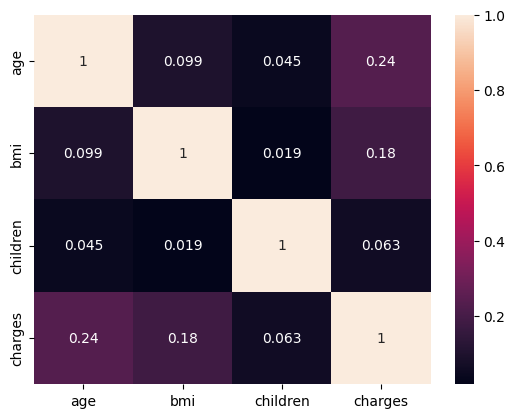

In [275]:
cor_mat = df.corr()
sns.heatmap(cor_mat,annot=True)

<Axes: xlabel='age', ylabel='charges'>

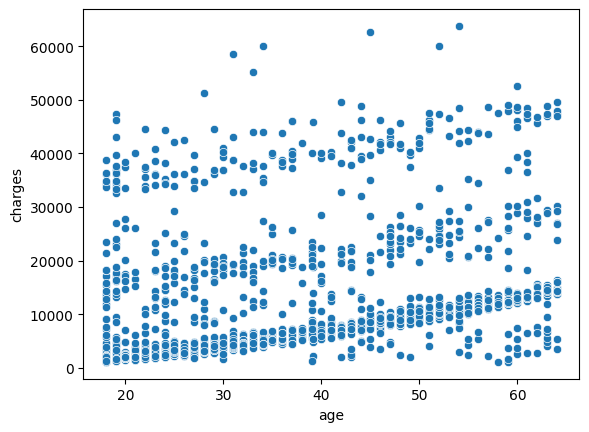

In [276]:
sns.scatterplot(df,x=df['age'],y=df['charges'])

In [277]:
num_col

['age', 'bmi', 'children', 'charges']

In [278]:
cat_cols

['smoker', 'region', 'sex', 'P-BMI']

In [279]:
to_scale = num_col
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler()
df[to_scale] = scaler.fit_transform(df[to_scale])

In [280]:
to_label_encode = cat_cols
encoder = LabelEncoder()
df[to_label_encode] = df[to_label_encode].apply(encoder.fit_transform)

In [281]:
df

,age,sex,bmi,children,smoker,region,charges,P-BMI
0,-1.426217,0,-0.447199,-0.904452,1,3,0.300530,0
1,-1.497146,1,0.509503,-0.070927,0,2,-0.954003,0
2,-0.787848,1,0.384007,1.596124,0,2,-0.728582,0
3,-0.433199,1,-1.293889,-0.904452,0,1,0.722550,0
4,-0.504128,1,-0.287477,-0.904452,0,1,-0.776797,0
...,...,...,...,...,...,...,...,...
1558,0.205170,1,-1.685860,-0.904452,0,3,-0.932577,0
1559,0.630749,1,0.758864,-0.904452,0,3,-0.893430,0
1560,-0.007619,1,-1.030674,-0.904452,0,2,-0.091565,0
1561,1.694697,1,-1.979227,-0.904452,0,3,-0.305075,0


In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df.drop('charges',axis=1,inplace=False)
y = df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [283]:
y_pred_tr = model.predict(x_train)

In [284]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [285]:
print(mse,mae)

0.4713668687154511 0.44034527839784776


In [286]:
mse = mean_squared_error(y_train,y_pred_tr)
mae = mean_absolute_error(y_train,y_pred_tr)

In [287]:
print(mse,mae)

0.41253529842701203 0.4410509891849645
